In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
import unicodedata
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from cleantext import clean
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## Sentiment Analysis On Elon Musk Dataset

In [2]:
df = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\Elon_musk.csv", encoding = "Latin",index_col = 0)

In [3]:
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.reset_index(inplace = True, drop = True)

## Text Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
df['clean_text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")
df.head()

C:\Users\shree\AppData\Local\Temp\ipykernel_14896\4112825854.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")


,Text,clean_text
0,@kunalb11 Im an alien,kunalb I m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ID AA Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,@gtera27 Doge is underestimated,gtera Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amazi...


In [8]:
df['clean_text'] = df['clean_text'].str.lower()
df

,Text,clean_text
0,@kunalb11 Im an alien,kunalb i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...


In [9]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [10]:
df['clean_text'] = df['clean_text'].apply(remove_html_tags)
df

,Text,clean_text
0,@kunalb11 Im an alien,kunalb i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...


In [11]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [12]:
df['clean_text'] = df['clean_text'].apply(remove_url)
df

,Text,clean_text
0,@kunalb11 Im an alien,kunalb i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...


In [13]:
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text
        

In [14]:
df['clean_text'] = df['clean_text'].apply(remove_punc)
df

,Text,clean_text
0,@kunalb11 Im an alien,kunalb i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...


In [15]:
def text_tokanize(text):
    tokens = nltk.word_tokenize(text)
    text = [word.lower() for word in tokens if word.isalpha()]
    return text

In [16]:
df['tokanize_text'] = df['clean_text'].apply(text_tokanize)
df

,Text,clean_text,tokanize_text
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, i, m, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, on, cyberpunk,..."
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]"
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, for, ..."
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]"
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, and, dumber, is, u, f,..."


In [17]:
from nltk.corpus import stopwords
def remove_stop_words(text):
    stop_words = set(stopwords.words("english"))
    text = [word for word in text if word not in stop_words]
    return text

In [18]:
df['tokanize_text'] = df['tokanize_text'].apply(remove_stop_words)
df

,Text,clean_text,tokanize_text
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr..."
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]"
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, amazi..."
...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]"
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, dumber, u, f, u, f]"


In [19]:
# Example Stemming, and Lemmatization 
from nltk.stem import PorterStemmer, WordNetLemmatizer
def text_stemmer(text):
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def text_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text


In [20]:
df['stemmed_text'] = df['tokanize_text'].apply(text_stemmer)
df['lemmatized_text'] = df['tokanize_text'].apply(text_lemmatizer)
df

,Text,clean_text,tokanize_text,stemmed_text,lemmatized_text
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, alien]","[kunalb, alien]","[kunalb, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[id, aa, carmack, ray, trace, cyberpunk, hdr, ...","[id, aa, carmack, ray, tracing, cyberpunk, hdr..."
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotify, great, interview]"
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, underestimated]","[gtera, doge, underestim]","[gtera, doge, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratulation, tesla, china, amazin..."
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvy, true, sound, surreal, negative, prop..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, read, ur, terms, amp, c...","[ppathol, make, sure, read, ur, term, amp, con...","[ppathole, make, sure, read, ur, term, amp, co..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathole, samwise, gamgee]"
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, dumber, u, f, u, f]","[ppathol, altho, dumb, dumber, u, f, u, f]","[ppathole, altho, dumb, dumber, u, f, u, f]"


In [21]:
from nltk import pos_tag
def pos_tags_text(text):
    text = nltk.pos_tag(text)
    return text

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
df['pos_tagged_text'] = df['tokanize_text'].apply(pos_tags_text)
df

,Text,clean_text,tokanize_text,stemmed_text,lemmatized_text,pos_tagged_text
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, alien]","[kunalb, alien]","[kunalb, alien]","[(kunalb, NN), (alien, NN)]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[id, aa, carmack, ray, trace, cyberpunk, hdr, ...","[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[(id, NN), (aa, VBZ), (carmack, NN), (ray, NN)..."
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotify, great, interview]","[(joerogan, JJ), (spotify, VBZ), (great, JJ), ..."
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, underestimated]","[gtera, doge, underestim]","[gtera, doge, underestimated]","[(gtera, NN), (doge, NN), (underestimated, VBD)]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratulation, tesla, china, amazin...","[(teslacn, JJ), (congratulations, NNS), (tesla..."
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvy, true, sound, surreal, negative, prop...","[(flcnhvy, NN), (true, JJ), (sounds, VBZ), (su..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, read, ur, terms, amp, c...","[ppathol, make, sure, read, ur, term, amp, con...","[ppathole, make, sure, read, ur, term, amp, co...","[(ppathole, JJ), (make, VBP), (sure, JJ), (rea..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathole, samwise, gamgee]","[(teslagong, JJ), (ppathole, JJ), (samwise, NN..."
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, dumber, u, f, u, f]","[ppathol, altho, dumb, dumber, u, f, u, f]","[ppathole, altho, dumb, dumber, u, f, u, f]","[(ppathole, JJ), (altho, NN), (dumb, JJ), (dum..."


In [24]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['clean_text'], 20)

In [25]:
from nltk import ne_chunk
def named_entity_recog(text):
    text = ne_chunk(text)
    return text

In [26]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
df['ner_tagged_text'] = df['pos_tagged_text'].apply(named_entity_recog)
df

,Text,clean_text,tokanize_text,stemmed_text,lemmatized_text,pos_tagged_text,ner_tagged_text
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, alien]","[kunalb, alien]","[kunalb, alien]","[(kunalb, NN), (alien, NN)]","[(kunalb, NN), (alien, NN)]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[id, aa, carmack, ray, trace, cyberpunk, hdr, ...","[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[(id, NN), (aa, VBZ), (carmack, NN), (ray, NN)...","[(id, NN), (aa, VBZ), (carmack, NN), (ray, NN)..."
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotify, great, interview]","[(joerogan, JJ), (spotify, VBZ), (great, JJ), ...","[(joerogan, JJ), (spotify, VBZ), (great, JJ), ..."
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, underestimated]","[gtera, doge, underestim]","[gtera, doge, underestimated]","[(gtera, NN), (doge, NN), (underestimated, VBD)]","[(gtera, NN), (doge, NN), (underestimated, VBD)]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratulation, tesla, china, amazin...","[(teslacn, JJ), (congratulations, NNS), (tesla...","[(teslacn, JJ), (congratulations, NNS), (tesla..."
...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvy, true, sound, surreal, negative, prop...","[(flcnhvy, NN), (true, JJ), (sounds, VBZ), (su...","[(flcnhvy, NN), (true, JJ), (sounds, VBZ), (su..."
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, read, ur, terms, amp, c...","[ppathol, make, sure, read, ur, term, amp, con...","[ppathole, make, sure, read, ur, term, amp, co...","[(ppathole, JJ), (make, VBP), (sure, JJ), (rea...","[(ppathole, JJ), (make, VBP), (sure, JJ), (rea..."
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathole, samwise, gamgee]","[(teslagong, JJ), (ppathole, JJ), (samwise, NN...","[(teslagong, JJ), (ppathole, JJ), (samwise, NN..."
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, dumber, u, f, u, f]","[ppathol, altho, dumb, dumber, u, f, u, f]","[ppathole, altho, dumb, dumber, u, f, u, f]","[(ppathole, JJ), (altho, NN), (dumb, JJ), (dum...","[(ppathole, JJ), (altho, NN), (dumb, JJ), (dum..."


In [28]:
df['lemmatized_str'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))
df

,Text,clean_text,tokanize_text,stemmed_text,lemmatized_text,pos_tagged_text,ner_tagged_text,lemmatized_str
0,@kunalb11 Im an alien,kunalb i m an alien,"[kunalb, alien]","[kunalb, alien]","[kunalb, alien]","[(kunalb, NN), (alien, NN)]","[(kunalb, NN), (alien, NN)]",kunalb alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id aa carmack ray tracing on cyberpunk with h...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[id, aa, carmack, ray, trace, cyberpunk, hdr, ...","[id, aa, carmack, ray, tracing, cyberpunk, hdr...","[(id, NN), (aa, VBZ), (carmack, NN), (ray, NN)...","[(id, NN), (aa, VBZ), (carmack, NN), (ray, NN)...",id aa carmack ray tracing cyberpunk hdr next l...
2,@joerogan @Spotify Great interview!,joerogan spotify great interview,"[joerogan, spotify, great, interview]","[joerogan, spotifi, great, interview]","[joerogan, spotify, great, interview]","[(joerogan, JJ), (spotify, VBZ), (great, JJ), ...","[(joerogan, JJ), (spotify, VBZ), (great, JJ), ...",joerogan spotify great interview
3,@gtera27 Doge is underestimated,gtera doge is underestimated,"[gtera, doge, underestimated]","[gtera, doge, underestim]","[gtera, doge, underestimated]","[(gtera, NN), (doge, NN), (underestimated, VBD)]","[(gtera, NN), (doge, NN), (underestimated, VBD)]",gtera doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazi...,"[teslacn, congratulations, tesla, china, amazi...","[teslacn, congratul, tesla, china, amaz, execu...","[teslacn, congratulation, tesla, china, amazin...","[(teslacn, JJ), (congratulations, NNS), (tesla...","[(teslacn, JJ), (congratulations, NNS), (tesla...",teslacn congratulation tesla china amazing exe...
...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the n...,"[flcnhvy, true, sounds, surreal, negative, pro...","[flcnhvi, true, sound, surreal, neg, propagand...","[flcnhvy, true, sound, surreal, negative, prop...","[(flcnhvy, NN), (true, JJ), (sounds, VBZ), (su...","[(flcnhvy, NN), (true, JJ), (sounds, VBZ), (su...",flcnhvy true sound surreal negative propaganda...
1995,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp con...,"[ppathole, make, sure, read, ur, terms, amp, c...","[ppathol, make, sure, read, ur, term, amp, con...","[ppathole, make, sure, read, ur, term, amp, co...","[(ppathole, JJ), (make, VBP), (sure, JJ), (rea...","[(ppathole, JJ), (make, VBP), (sure, JJ), (rea...",ppathole make sure read ur term amp condition ...
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,"[teslagong, ppathole, samwise, gamgee]","[teslagong, ppathol, samwis, gamge]","[teslagong, ppathole, samwise, gamgee]","[(teslagong, JJ), (ppathole, JJ), (samwise, NN...","[(teslagong, JJ), (ppathole, JJ), (samwise, NN...",teslagong ppathole samwise gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is u f ...,"[ppathole, altho, dumb, dumber, u, f, u, f]","[ppathol, altho, dumb, dumber, u, f, u, f]","[ppathole, altho, dumb, dumber, u, f, u, f]","[(ppathole, JJ), (altho, NN), (dumb, JJ), (dum...","[(ppathole, JJ), (altho, NN), (dumb, JJ), (dum...",ppathole altho dumb dumber u f u f


## Exploratory Data analysis

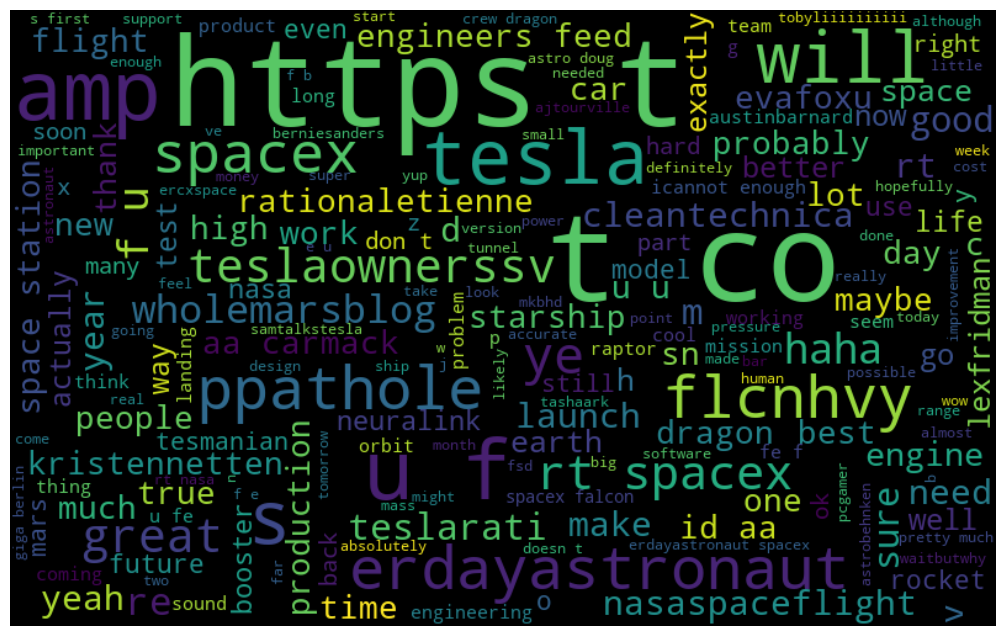

In [29]:
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
tweets_text=' '.join(df['clean_text'])
tweets_text

' kunalb   i m an alien  id aa carmack ray tracing on cyberpunk with hdr is next level  have you tried it   joerogan  spotify great interview   gtera   doge is underestimated  teslacn congratulations tesla china for amazing execution last year  now on to the next for even more   happy new year of the ox  https   t co  wfkmyu oj frodo was the underdoge  all thought he would fail  himself most of all  https   t co zgxjfdzzrm  owensparks   flcnhvy  anonyx   haha thanks     flcnhvy  anonyx   indeed  tweets definitely do not represent real world time allocation  the most entertaining outcome is the most likely  givedirectly just sent some just agree to do clubhouse with  kanyewest https   t co  rwe uhsts  geoffkeighley  unrealengine it s getting real bought some dogecoin for lil x  so he can be a toddler hodler  joshmanmode he definitely has issues  but the sentencing seems a bit high  freewalletorg thanks for fixing  freewalletorg please unlock my account  astrojordy  u     f     u     f  

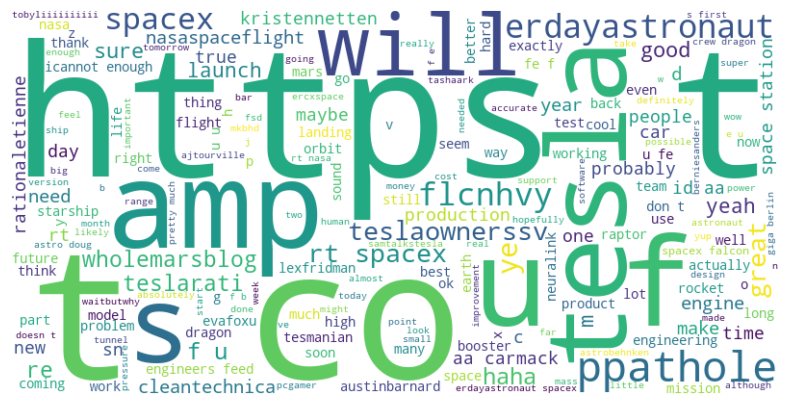

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(tweets_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

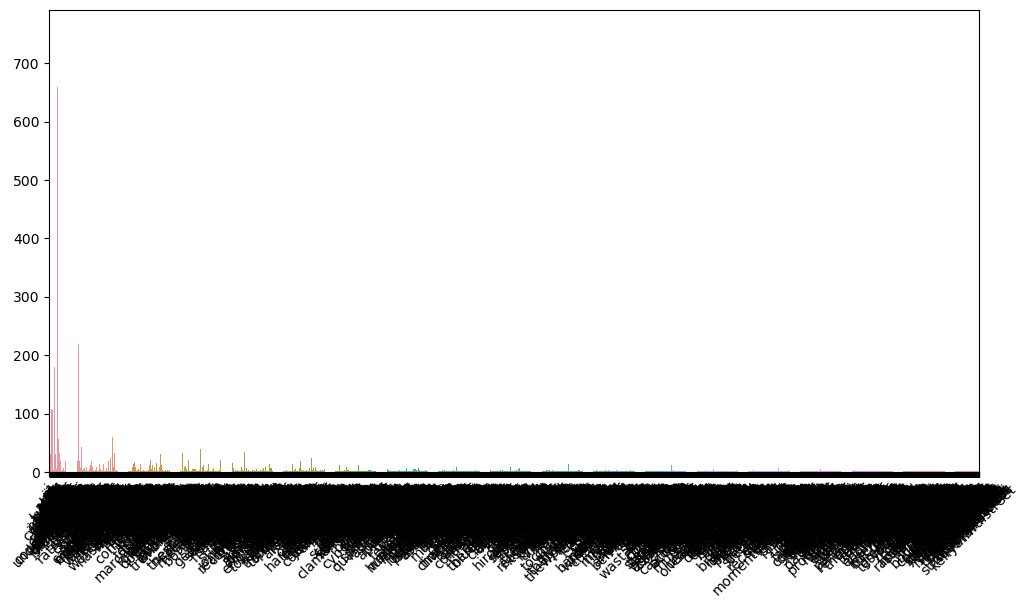

In [32]:
from collections import Counter

words = tweets_text.split()
word_freq = Counter(words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()))
plt.xticks(rotation=45)
plt.show()

In [ ]:


sentence_lengths = [len(tweets_text.split()) for sentence in tweets_text]

plt.hist(sentence_lengths, bins=20, edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

## Split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemmatized_str'])

In [ ]:
cv = CountVectorizer()

x = cv.fit_transform(df['lemmatized_str'])
x

In [ ]:
x.toarray()

In [ ]:
pd.DataFrame(x.toarray())

In [ ]:
cv.vocabulary_

In [ ]:
cv.get_feature_names_out()

In [ ]:
pd.DataFrame(x.toarray(), columns= cv.get_feature_names_out())

## 2. CountVectorizer with N-grams 

In [ ]:
df

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(df['lemmatized_str'])

In [ ]:
print(cv_ngram_range.get_feature_names_out())

In [ ]:
print(bow_matrix_ngram.toarray())

## Binary Weights

In [ ]:
cv = CountVectorizer(binary=True)

x = cv.fit_transform(df['lemmatized_str'])
pd.DataFrame(x.toarray(), columns= cv.get_feature_names_out())

In [ ]:
tf = TfidfVectorizer()

data = tf.fit_transform(df['lemmatized_str'])
data.toarray()

In [ ]:
tf.vocabulary_

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
pd.DataFrame(data.toarray(), columns=tf.get_feature_names_out()).head()